# DS3000 Day 3

Sep 18/19, 2025

Admin
- Homework 2 due by **October 3rd**

Push-Up Tracker
- Section 03: 0
- Section 04: 1
- Section 05: 1

Content:
- Exploring Data
    - Plotting
    - (Next Time):
      - Cleaning Data (we've already done some of this)
      - Basic Data Summaries

In [ ]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd

# If you remember in previous class we created a pandas dataframe using list and zip functions, here is what each of them do:

wrcsv=pd.DataFrame(list(zip(*[URLs,frndCnt, revNum])), columns=['URLs','Address','Reviews'])

list(zip(*[URLs,frndCnt, revNum])

Unpacking with *:

The * operator is used to unpack the list of lists. It spreads the individual lists (URLs, frndCnt, revNum) so that each can be treated as separate arguments for the zip function.

Zip function:

zip() takes multiple iterables (in this case, URLs, frndCnt, and revNum) and aggregates them into tuples. The first elements of each list are grouped together, then the second elements, and so on.

Lastly `list`

The zip() function produces a zip object, which is an iterator. Wrapping it with list() converts the zip object into a list of tuples.

And then we turn them in a DataFrame, and we can provide the coloumns name.


In [ ]:
df1=pd.read_csv('big_recipe.csv')
df1.head()

,name,href,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Vitamin C,Calcium,Iron,Potassium,Total Sugars,query
0,Homemade Mac and Cheese,https://www.allrecipes.com/recipe/11679/homema...,48,30,142,881,65,3,37,1.0,865.0,3.0,522,NaN,mac and cheese
1,Lobster Mac and Cheese,https://www.allrecipes.com/recipe/171001/lobst...,49,30,218,1113,55,3,61,2.0,1189.0,3.0,687,6.0,mac and cheese
2,Slow Cooker Mac and Cheese,https://www.allrecipes.com/recipe/237311/slow-...,25,15,99,524,34,1,18,0.0,368.0,2.0,229,5.0,mac and cheese
3,Butternut Squash Mac and Cheese,https://www.allrecipes.com/recipe/235805/butte...,15,9,44,286,27,3,13,9.0,336.0,1.0,303,4.0,mac and cheese
4,Mom's Favorite Baked Mac and Cheese,https://www.allrecipes.com/recipe/24321/moms-f...,33,21,100,1194,37,2,28,1.0,643.0,2.0,287,5.0,mac and cheese


# Exploring Data with Plots and Basic Data Summaries

After we did all this work to scrape our data, what next? Assuming your data is all clean (a big assumption!), the next step is basic level analysis:
- Graphically describe/summarize the features in your data set
- Numerically describe/summarize the features in your data set

This is an important step! You can't just jump directly into machine learning, since a lot of the choices you make when constructing your machine learning models depends on your understanding of the data. A quick plot:

In [ ]:
import plotly.express as px

fig=px.scatter(data_frame=df1, x='Cholesterol', y='Total Fat', color='query', hover_data=['name'])
fig.show('iframe')

# How do I explore a new-to-me dataset?

## First: View raw data

- `.shape()`
- `.columns()`
- `.unique()`
- `Counter()`

## Second: Make some plots

- matplotlib
- seaborn
- plotly

## Third: Calculate numerical summaries

In [ ]:
# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/madhurpant/europe-population-data)
df_EUpop = pd.read_csv('europe_pop_data.zip')

df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Europe,Western Europe,Vienna,"83,879 km²","8,917,000",78.9,83.6,9.4,10.3
1,Belgium,Europe,Western Europe,Brussels,"30,530 km²","11,544,000",78.6,83.1,9.9,11.0
2,France,Europe,Western Europe,Paris,"549,087 km²","67,380,000",79.2,85.3,10.9,9.9
3,Germany,Europe,Western Europe,Berlin,"357,580 km²","83,161,000",78.6,83.4,9.3,11.9
4,Liechtenstein,Europe,Western Europe,Vaduz,161 km²,"38,137",80.1,83.6,9.1,8.2


In [ ]:
# what are all the different values which appear in a given column?
df_EUpop['region'].unique()

array(['Western Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe'], dtype=object)

In [ ]:
# using Counter to count number of entries with each value
# this is the most common way to numerically summarize a categorical variable
from collections import Counter

Counter(df_EUpop['region'])

Counter({'Eastern Europe': 10,
         'Northern Europe': 10,
         'Western Europe': 8,
         'Southern Europe': 8})

# Extra credit 1

## Using groupby on `male_life_expectancy` column, describe it.(Hint: There is a function that can do this)

In [ ]:
# Put your code here:

In [ ]:
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9


# If all columns are numeric, you can just apply `.mean()` to the whole thing, but if some are categorical, you need NumPy to help:

In [ ]:
import numpy as np

#np.r_ is a NumPy shortcut to combine ranges or lists.

df_EUpop.iloc[:, np.r_[2,4:11]].groupby('region').mean()

TypeError: agg function failed [how->mean,dtype->object]

Notice that if we tried to include are and population, this won't work because they are currently formatted as non-numeric data; before we continue we should do a bit of data cleaning (we'll do more later). How do we convert these values to numeric? Notice that the issues are that:

- area has the `km^2` string
- population has commas

In [ ]:
# deal with area
# the regular expression \D removes anything that's not a digit; we can actually do this for both area and population
df_EUpop['area'] = df_EUpop['area'].str.replace(r'\D', '', regex=True).astype(int)

df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Europe,Western Europe,Vienna,83879,"8,917,000",78.9,83.6,9.4,10.3
1,Belgium,Europe,Western Europe,Brussels,30530,"11,544,000",78.6,83.1,9.9,11.0
2,France,Europe,Western Europe,Paris,549087,"67,380,000",79.2,85.3,10.9,9.9
3,Germany,Europe,Western Europe,Berlin,357580,"83,161,000",78.6,83.4,9.3,11.9
4,Liechtenstein,Europe,Western Europe,Vaduz,161,"38,137",80.1,83.6,9.1,8.2


In [ ]:
df_EUpop['population'] = df_EUpop['population'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2


In [ ]:
# we may want to add population density (pop/area)
df_EUpop['pop_density'] = (df_EUpop.population/df_EUpop.area).round(1)
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9


In [ ]:
# re-do the quick numeric analysis
df_EUpop.iloc[:, np.r_[2,4:11]].groupby('region').mean()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
region,,,,,,,
Eastern Europe,1882626.0,29023700.00,70.4000,78.5800,9.4100,13.8700,82.0300
Northern Europe,180600.9,10568446.30,77.7600,83.2000,10.1300,10.2200,64.1300
Southern Europe,110254.5,10167079.75,77.0875,82.1500,9.0625,11.3500,277.5250
Western Europe,138332.5,24718694.50,79.4625,83.9375,9.8000,9.6375,243.6375


## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data or even songs
![he](https://preview.redd.it/charts-by-marshall-eriksen-v0-i0beswa7acab1.jpg?width=1080&crop=smart&auto=webp&s=66e544467c5a5fbf7ad36cec41c59b3460339638)
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - check out [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful)
         - check out [https://informationisbeautiful.net/](https://informationisbeautiful.net/)
![fav1](https://i.pinimg.com/564x/43/a1/96/43a1967da1be0e9d0c48d556be78e10d.jpg)

## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart (They can get very messy)
![e](https://www.eea.europa.eu/data-and-maps/daviz/learn-more/pie-chart-example-with-too/image)
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/xkvnk1/oc_saw_a_post_of_gender_balance_and_average/)
- sparse charts, with little information in them, are great to communicate
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/xiy4fc/oc_nights_when_the_temperature_never_dropped/)


## Multiple Modules

There are several plotting modules. We will see examples from three:

- matplotlib
- seaborn
- plotly

# Histograms
We use histograms to investigate how often certain values appear in the data. 
- The x-axis is (almost) always the values which occur
- the y-axis is how often they occur

- [a delicious example](https://i.redd.it/x42zrm4hi4x51.jpg)
    - they have two columns for s ... easier to read but not proper for Data Science
    - Also, not a histogram because letters aren't numbers...


Todo list:

- `plt.hist()` on `male_life_expectancy`
- resizing figure
- `density` keyword
- labelling axes
- `bin` argument
- seaborn makes it look nice
- exporting to pdf:

```python
from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')
    
```

Let's make a histogram of `male_life_expectancy`, first in matplotlib:

In [ ]:
df_EUpop

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9
5,Luxembourg,Europe,Western Europe,Luxembourg,2590,630419,79.4,84.2,10.2,7.3,243.4
6,Netherlands,Europe,Western Europe,Amsterdam,41543,17442000,79.8,83.1,9.7,9.7,419.9
7,Switzerland,Europe,Western Europe,Bern,41290,8637000,81.1,85.2,9.9,8.8,209.2
8,Belarus,Europe,Eastern Europe,Беларусь,207600,9380000,69.3,79.4,9.3,13.0,45.2
9,Bulgaria,Europe,Eastern Europe,Sofia,111000,6934000,69.9,77.5,8.5,18.0,62.5


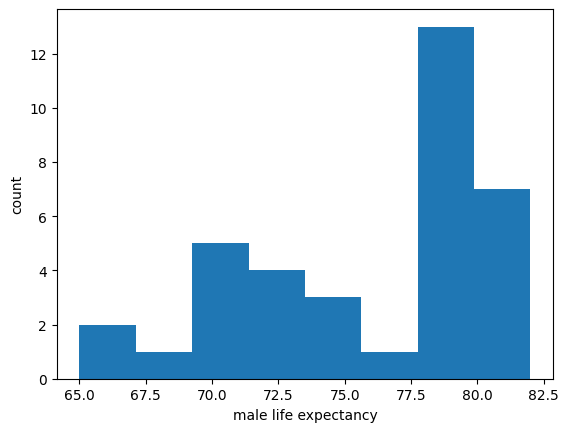

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# uses seaborn to adjust font size; sometimes not necessary, but 1.2 is a good default
# sns.set(font_scale=1.2)

# set the bins based on the range of the feature of interest So here these values are for the min and max rates of the male_life_expentancy.
bins = np.linspace(65, 82, 9)

# use matplotlib to make the histogram
plt.hist(df_EUpop['male_life_expectancy'], bins=bins)


plt.xlabel('male life expectancy')
plt.ylabel('count')

# the below will save the histogram as a .pdf file in your directory
f = 'EU_male_life_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

Text(0, 0.5, 'density')

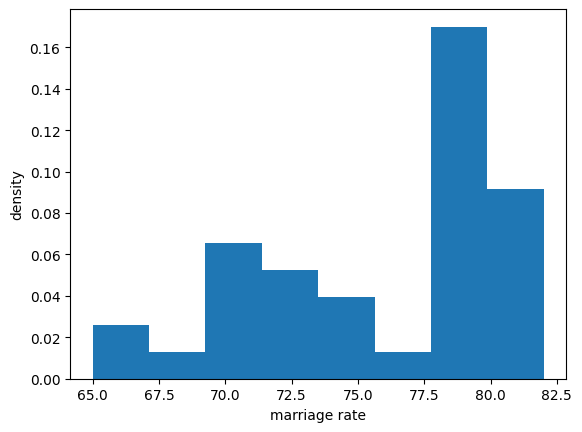

In [ ]:
# change the y-axis to represent the density (so that the sum of all columns is 1)
plt.hist(df_EUpop['male_life_expectancy'], bins=bins, density=True)
plt.xlabel('marriage rate')
plt.ylabel('density')

So, while the graph is looking perfect, you may think that it renders really good on your screen. however, that might not be the case. When you add the graph in, let's say, a Word document, you may need to change the size and then it can make the font size of the labels and the ticks smaller. 

However, we do have a fix!

`plt.xlabel('Days', fontsize=38)`

`plt.ylabel('Average Values Per Day',fontsize=38)`

`plt.xticks(fontsize=38)`

`plt.yticks(fontsize=38)`


# EC 2 

## Create only one histogram for the following two coloumns `male_life_expectancy` and `female_life_expectancy`. Make sure the bins are representative, i.e., make sure you select the appropriate value for the min and max based on the min and max of the two coloumns. Additionally, make sure the x label says `life expectancy` with a font size of 20, y label says `count` with fontsize 20 and all the tick sizes are with fontsize 30. Additionally, make sure that the two coloumns are in different colours. 

In [ ]:
# Put your code here:



## Scatter plots

What is the relationship between `birth_rate` and `death_rate` in:
1. `Eastern Europe`
1. `Northern Europe`

Using plotly express:
- `px.scatter`
- `opacity` (this is the `alpha` option in matplotlib)
- multiple scatters on same plot
- legend
- log scale

In [ ]:
# select only rows corresponding to given region
bool_eeu = df_EUpop['region'] == 'Eastern Europe'
df_eeu = df_EUpop.loc[bool_eeu, :]

# scatter
fig = px.scatter(df_eeu, x='birth_rate', y='death_rate', opacity=.5)

# label
fig.update_layout(
    title_text='births and deaths in Eastern Europe',
    xaxis_title='birth rate',
    yaxis_title='death rate')
fig.show('iframe')

In [ ]:
two_regions = ['Eastern Europe', 
               'Northern Europe']

df_subset = df_EUpop[df_EUpop['region'].isin(two_regions)]

# Can include labels inside the function itself to make things cleaner
# And, can add hover_data
fig = px.scatter(
    df_subset,
    x='birth_rate',
    y='death_rate',
    color='region',
    opacity=0.5,
    labels={'birth_rate': 'Birth Rate', 'death_rate': 'Death Rate'},
    title='Comparing Relationship of Births and Deaths in Europe',
    hover_data=['country_name']
)

fig.update_layout(
    width=800,
    height=600
)
fig.show('iframe')

# Another way of doing this

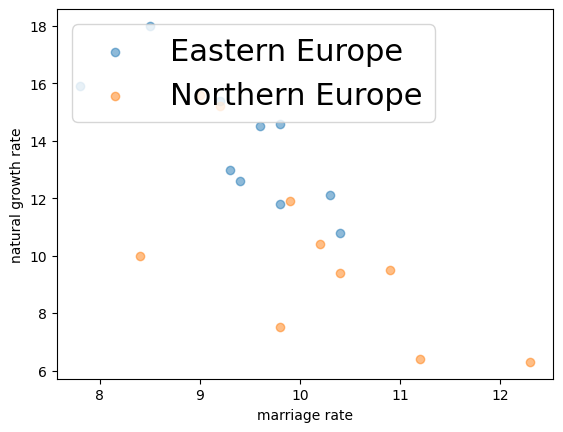

In [ ]:
two_regions = ['Eastern Europe', 
               'Northern Europe']

for region in two_regions:
    # boolean index
    bool_region = df_EUpop['region'] == region
    df_region = df_EUpop.loc[bool_region, :]

    # scatter
    plt.scatter(df_region['birth_rate'],
                df_region['death_rate'], alpha=.5, label=region)
    
# plt.legend()
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')


# You can always change the position of where the legend would be. It is easy. Lets do it. (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
plt.legend(loc='upper left',fontsize=22)


## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [ ]:
import plotly

plotly.offline.plot(fig, filename='birth_death_EU.html');

# Another way for the purposes of embedding in your blog
fig.write_html('birth_death_EU2.html', full_html=False, include_plotlyjs='cdn')

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

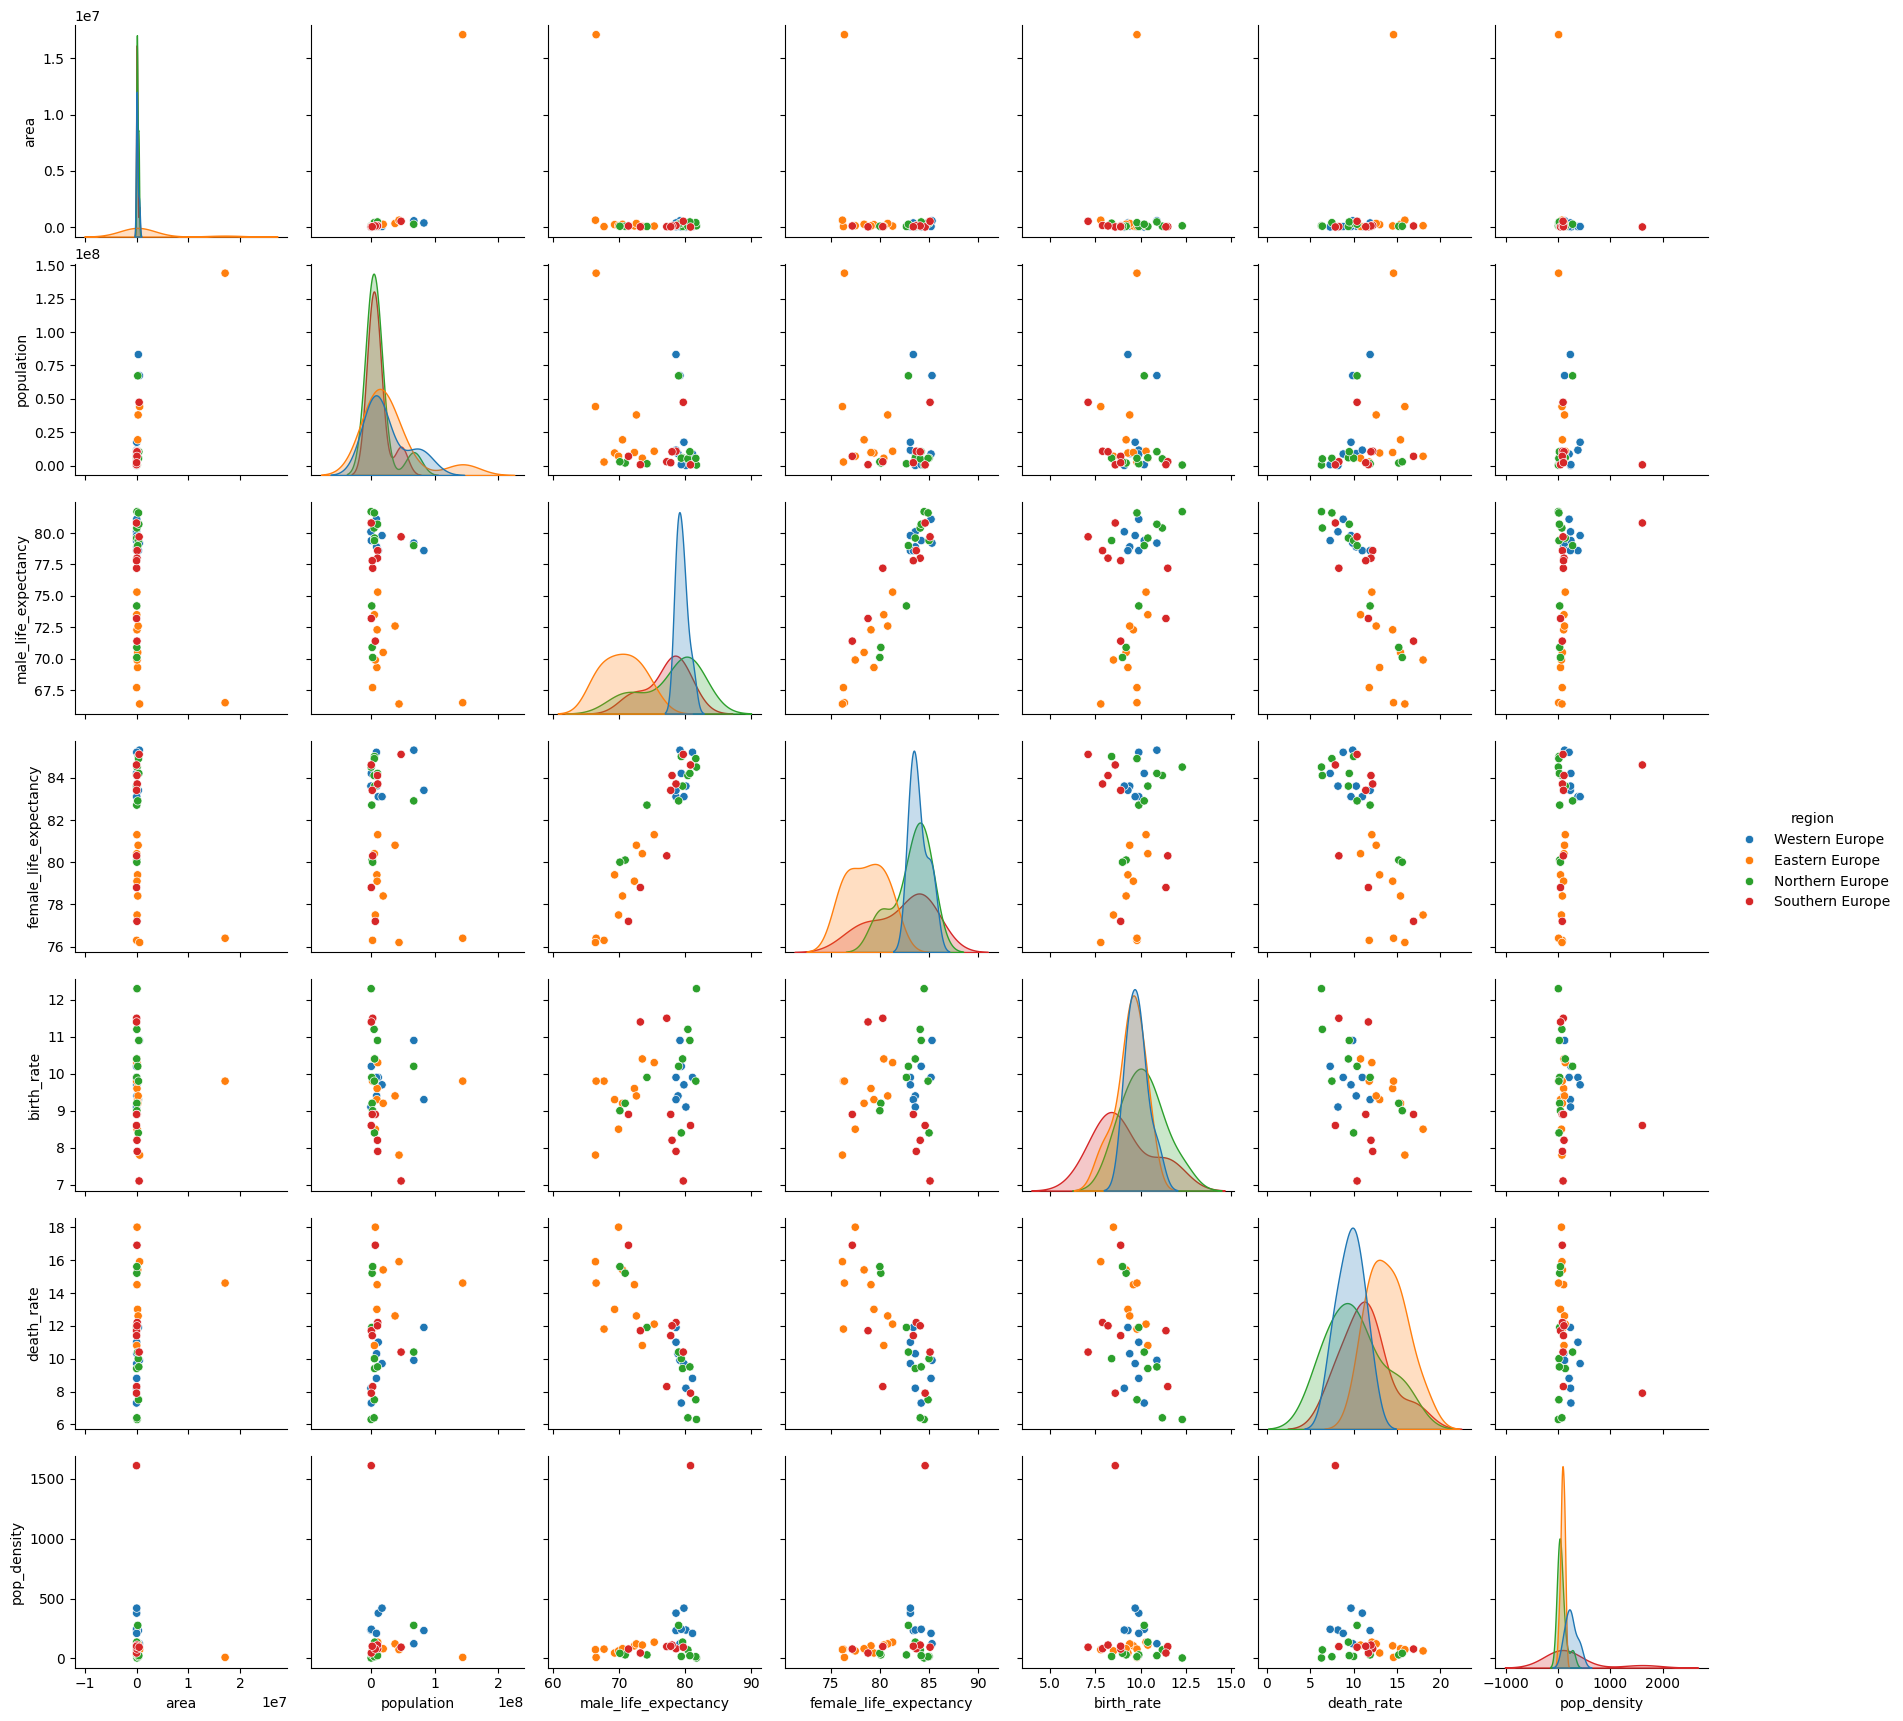

In [ ]:
sns.pairplot(df_EUpop, hue='region')

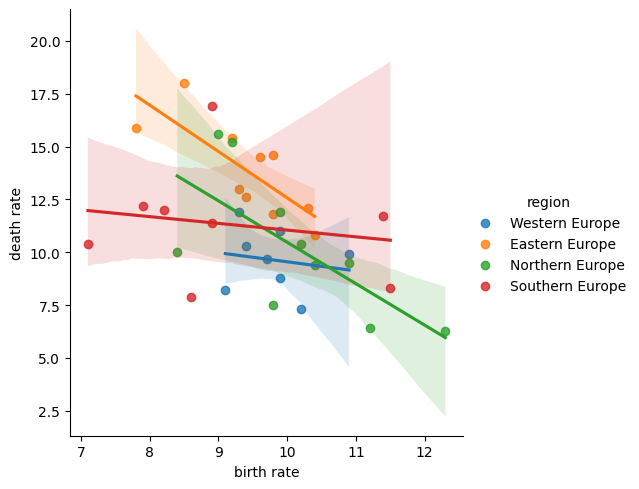

In [ ]:
# Plot death rate as a function of birth rate by region
g = sns.lmplot(
    data=df_EUpop,
    x="birth_rate", y="death_rate", hue="region",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("birth rate", "death rate")

## Cleaning Data before Numerical Summaries

Before we can truly begin discussing calucating numerical summaries of our data, we need to make sure our data are clean! Missing values, incorrect values, etc. These can all cause issues in calculating the basic statistics we use to summarize data. 

![g](https://www.geopoll.com/wp-content/uploads/2021/01/outlier-illustration-copy.jpg)


## Data cleaning is an important step, before doing any kind of summaries of the data or plotting!

# Cleaning Data Speed Run

![g](https://miro.medium.com/v2/resize:fit:500/0*a_-_wgLECH1854Lk.jpg)


## DataFrame Manipulations

- Missing values (NaN)
    - why they're there
    - what to do with them
        - discard data
        - fill all missing values in with something reasonable

**Note:** There is much more we could talk about in terms of dealing with missing data; this is just a basic overview. You may want to consider investigating other options if you run into missing data issues on your projects

## Missing Data

* Pandas automatically assigns **NaN**, "Not a Number", to missing values while reading a file

## Remember, when you open a csv file in Excel or Numbers, you would not see **NaN** You will just see empty cell

* some folks use other values to indicate a "missing" value
    - `-99` is popular, for some reason ...
    - use `na_values` argument of `read_csv()` to mark other values as **NaN**

## Please do not do this though:
![gd](https://media.geeksforgeeks.org/wp-content/uploads/20230502161948/WhatsApp-Image-2020-07-01-at-20925-AM.jpeg)

![he](https://media.tenor.com/dHVat9e2S38AAAAM/rat-cry-mouse-cutie.gif)

In [ ]:
# what about data with som eother way of identifying missing data?
# notice also a new read_ function
# !pip3 install openpxyxl --break-system-packages

df_miss = pd.read_excel('miss_data.xlsx')
df_miss

,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180,78,45,39,miss,42,40,miss
1,b,164,67,47,49,43,48,miss,miss
2,c,miss,miss,42,miss,46,47,42,miss
3,d,miss,miss,23,miss,miss,17,miss,miss
4,e,199,89,38,40,44,48,miss,miss
5,f,134,54,34,36,29,22,miss,miss
6,g,163,59,50,50,miss,46,49,miss
7,h,175,72,43,37,35,31,miss,miss
8,i,158,80,28,miss,38,34,39,miss
9,j,169,79,33,miss,25,28,miss,miss


In [ ]:
df_miss = pd.read_excel('miss_data.xlsx', index_col = 'patient', na_values = ('miss'))
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


### What to do with missing data?

* Option 0: Nothing (we've done this)
* Option 1: Discard all rows which are missing data (we've done this!)
* Option 2: Fill in missing data with reasonble guesses (impute; we haven't done this....)

### What to do with missing data?
* Option 0: Nothing
    - When the `skipna=True`, we ignore NaN in our averaging
    - other pandas methods, besides `DataFrame.mean()`, have `skipna` too

In [ ]:
# mean of each column (skip any NaN values, the default)
df_miss.mean(axis=0)

height        167.750000
weight         72.250000
trial0         38.300000
trial1         41.833333
trial2         37.142857
trial3         36.300000
trial4         42.500000
finaltrial           NaN
dtype: float64

### What to do with missing data?

* Option 1: Discard all rows / columns which have missing data
    - appropriate when we have other data which contains similar information as discarded rows
    - `DataFrame.dropna()`: drop all rows or columns with missing data
        - axis
        - how: 'any', 'all' (do we drop row / column if ...
            - 'any' of its values are nan
            - 'all' of its values are nan

In [ ]:
# drop rows with any nan values (default) ... nothing left
df_miss.dropna()

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,


In [ ]:
# drop columns with all nan values (unlikely, but possible)
h=df_miss['height'].dropna()
h


patient
a    180.0
b    164.0
e    199.0
f    134.0
g    163.0
h    175.0
i    158.0
j    169.0
Name: height, dtype: float64

In [ ]:
# drop row if it does not have at least three values that are **not** NaN
df_miss.dropna(thresh=3)
#df_miss.dropna(thresh=4)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


In [ ]:
# drop only if NaN in specific column
df_miss.dropna(subset=['trial4','trial1'])

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN


### What to do with missing data?

* Option 2: Fill in missing data
    - appropriate when we don't have much data, let's not waste any!
    - some known value
        - `DataFrame.fillna(value)`
    - some average value
        - `DataFrame.interpolate(method='zero')

In [ ]:
# if the trial is missing, let us assume they deserve a 0
df_miss.fillna(0)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,0.0
b,164.0,67.0,47,49.0,43.0,48,0.0,0.0
c,0.0,0.0,42,0.0,46.0,47,42.0,0.0
d,0.0,0.0,23,0.0,0.0,17,0.0,0.0
e,199.0,89.0,38,40.0,44.0,48,0.0,0.0
f,134.0,54.0,34,36.0,29.0,22,0.0,0.0
g,163.0,59.0,50,50.0,0.0,46,49.0,0.0
h,175.0,72.0,43,37.0,35.0,31,0.0,0.0
i,158.0,80.0,28,0.0,38.0,34,39.0,0.0


### Filling In a Different Value for Each Column

* Sometimes (as with height and weight) it doesn't make sense to give same value to everything
* Can fill in each column with a different value
* Pass in a dictionary containing column names as keys and desired NA values as values
    * **fillna(dictionary_of_values)**
    

In [ ]:
dict_fill = {'height': 170,
             'weight': 70,
             'trial0': 50,
             'trial1': 45,
             'trial2': 40,
             'trial3': 35,
             'trial4': 30,
             'finaltrial': 25}
df_miss.fillna(dict_fill)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,40.0,42,40.0,25.0
b,164.0,67.0,47,49.0,43.0,48,30.0,25.0
c,170.0,70.0,42,45.0,46.0,47,42.0,25.0
d,170.0,70.0,23,45.0,40.0,17,30.0,25.0
e,199.0,89.0,38,40.0,44.0,48,30.0,25.0
f,134.0,54.0,34,36.0,29.0,22,30.0,25.0
g,163.0,59.0,50,50.0,40.0,46,49.0,25.0
h,175.0,72.0,43,37.0,35.0,31,30.0,25.0
i,158.0,80.0,28,45.0,38.0,34,39.0,25.0


### Interpolation

https://en.wikipedia.org/wiki/2020_UK_GCSE_and_A-Level_grading_controversy

Because of the pandemic and the impossibility of organizing exams students got their imputed grades rather than take an exam.

How to implement that? We can fill in missing values with the average of the other row values

**But also, if you ever become a teacher, please don't do that to students.**

In [ ]:
# Step 1: fill missing trials (not height or weight, or finaltrial) with 0
df_miss.fillna(value={'trial0': 0, 'trial1': 0, 'trial2': 0, 'trial3': 0, 'trial4': 0}, inplace=True)
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,0.0,NaN
c,NaN,NaN,42,0.0,46.0,47,42.0,NaN
d,NaN,NaN,23,0.0,0.0,17,0.0,NaN
e,199.0,89.0,38,40.0,44.0,48,0.0,NaN
f,134.0,54.0,34,36.0,29.0,22,0.0,NaN
g,163.0,59.0,50,50.0,0.0,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,0.0,NaN
i,158.0,80.0,28,0.0,38.0,34,39.0,NaN


In [ ]:
# Step 2: get the mean score from first five trials per patient
means = df_miss[['trial0', 'trial1', 'trial2', 'trial3', 'trial4']].mean(axis=1)
means

patient
a    33.2
b    37.4
c    35.4
d     8.0
e    34.0
f    24.2
g    39.0
h    29.2
i    27.8
j    17.2
dtype: float64

In [ ]:
# Step 3: Fill the missing values in finaltrial with the means
df_miss.fillna(value = {'finaltrial': means})

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,33.2
b,164.0,67.0,47,49.0,43.0,48,0.0,37.4
c,NaN,NaN,42,0.0,46.0,47,42.0,35.4
d,NaN,NaN,23,0.0,0.0,17,0.0,8.0
e,199.0,89.0,38,40.0,44.0,48,0.0,34.0
f,134.0,54.0,34,36.0,29.0,22,0.0,24.2
g,163.0,59.0,50,50.0,0.0,46,49.0,39.0
h,175.0,72.0,43,37.0,35.0,31,0.0,29.2
i,158.0,80.0,28,0.0,38.0,34,39.0,27.8
